**Questions to Answer** <br><br>
1- What are the most demanded skills for the top 3 most popular data roles ? <br>
2- How are in-demand skills trending for Data Engineers ?<br>
3- How well do jobs and skills pay for Data Engineers ?<br>
4- What is the most optimal skill to learn for Data Engineers ? (High Demand and High Paying)

#### EDA for Data Engineer Jobs in the US

In [38]:
# Importing libs
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
dataset=load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [40]:
# Data cleanup
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
df['job_skills']=df.job_skills.apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

**Filter for US Data Engineer roles**

In [42]:
df_DE_US=df[ (df.job_country=='United States') & (df.job_title_short=='Data Engineer') ].copy()
df_DE_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"[python, qlik]","{'analyst_tools': ['qlik'], 'programming': ['p..."
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,Georgia,2023-09-15 13:56:18,True,False,United States,None,NaN,NaN,Infinite Computer Solutions,None,None
27,Data Engineer,"Principal Data Engineer (Lead), Knowledge Grap...","San Francisco, CA",via LinkedIn,Full-time,False,Georgia,2023-02-18 13:31:24,False,False,United States,None,NaN,NaN,Altos Labs,"[python, r, java]","{'programming': ['python', 'r', 'java']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785276,Data Engineer,Internship - Data Engineer,"Plainsboro Township, NJ",via SimplyHired,Full-time,False,Georgia,2023-01-18 06:48:35,False,False,United States,None,NaN,NaN,Novo Nordisk,"[word, excel, powerpoint]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
785462,Data Engineer,Sr. Data Engineer,"Washington, DC",via Indeed,Full-time,False,"New York, United States",2023-01-13 06:08:48,True,True,United States,None,NaN,NaN,Zscaler,"[sql, python, snowflake, airflow, tableau, pow...","{'analyst_tools': ['tableau', 'power bi', 'exc..."
785469,Data Engineer,IT Data Engineer,"Carol Stream, IL",via Indeed,Full-time,False,"California, United States",2023-01-07 06:07:11,False,True,United States,None,NaN,NaN,ZIP-PAK,"[java, python, sql]","{'programming': ['java', 'python', 'sql']}"
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."


**Explore job locations**

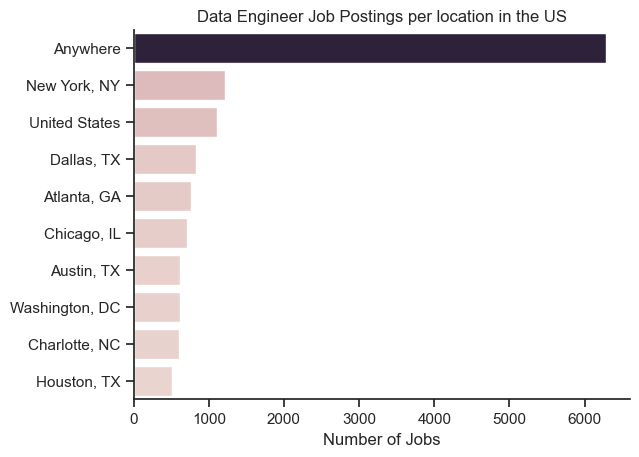

In [43]:
df_plot_location = df_DE_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_location,x='count',y='job_location',hue='count',legend=False)
sns.despine()
plt.title('Data Engineer Job Postings per location in the US')
plt.xlabel('Number of Jobs')
plt.ylabel(None);

**Explore job opportunities**

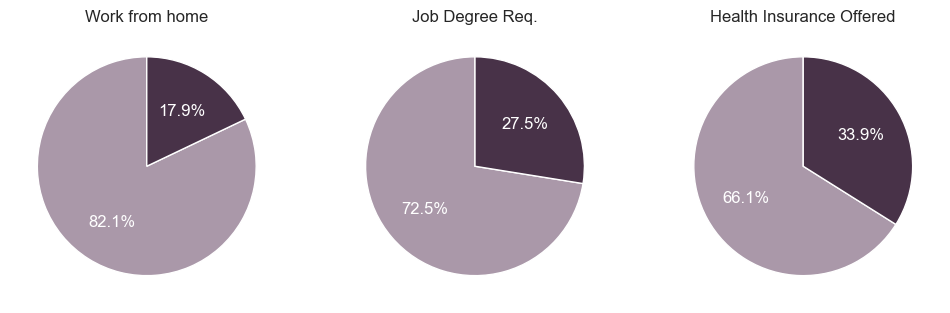

In [44]:
dict_column = {'job_work_from_home':'Work from home','job_no_degree_mention':'Job Degree Req.','job_health_insurance':'Health Insurance Offered'}

fig,ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DE_US[column].value_counts(),
                labels=['False','True'],
                autopct='%1.1f%%',
                startangle=90,
                colors=['#AA98A9','#483248'],
                textprops={'color':'white'})
    ax[i].set_title(title)

**Explore companies**

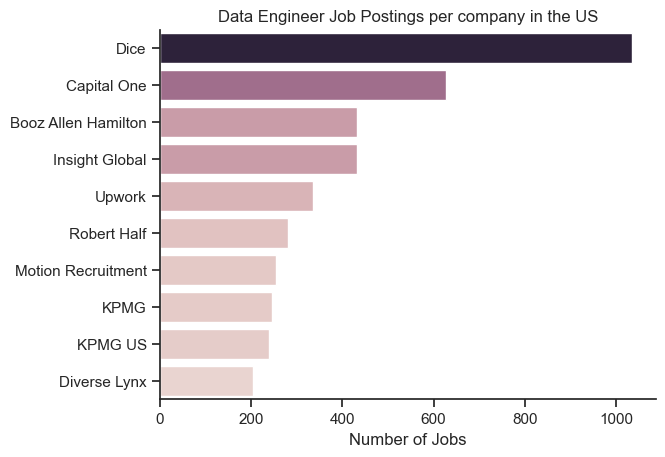

In [45]:
df_plot_company = df_DE_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_company,x='count',y='company_name',hue='count',legend=False)
sns.despine()
plt.title('Data Engineer Job Postings per company in the US')
plt.xlabel('Number of Jobs')
plt.ylabel(None);

#### What are the most skills in demand for the top 3 data roles ?

In [46]:
# Filter for the US country
df_US=df[df['job_country']=='United States'].copy()

In [47]:
# Explode 'job_skills' column
df_skills = df_US.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [48]:
# Count the total jobs for each job title to use it for calculation of the skill count in pct
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [49]:
# Show the frequency of each skill with each job title

df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [50]:
# Merge df_skills_count and df_job_title_count, based on the 'job_title_short' column
df_skills_pct = pd.merge(df_skills_count,df_job_title_count,on='job_title_short',how='left')

# Calculate the percentage of each skill within its job title
df_skills_pct['skill_percent'] = 100 * df_skills_pct['skill_count'] / df_skills_pct['jobs_total']

df_skills_pct

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


In [51]:
# Create a list of the top 3 roles

job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

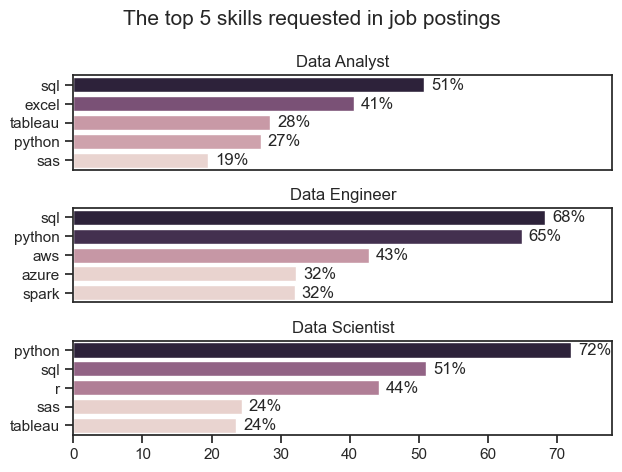

In [52]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_pct[df_skills_pct.job_title_short == job_title].head(5)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_percent')
    ax[i].set_title(job_title)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)

    # format the pct on the bars
    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center') 

    # keep the x-axis just for the first plot
    if i != len(job_titles) - 1:
        ax[i].set_xticks([]) 

fig.suptitle('The top 5 skills requested in job postings',fontsize=15)
fig.tight_layout();

#### How are in-demand skills trending for Data Engineers ?

In [53]:
# Filter for the data engineer role in the US
df_DE_US=df[ (df.job_country=='United States') & (df.job_title_short=='Data Engineer') ].copy()

In [54]:
# Extract the month from each job's posting date
df_DE_US['job_posted_month_no'] = df_DE_US['job_posted_date'].dt.month

In [55]:
# Explode the 'job_skills' column
df_DE_US_explode = df_DE_US.explode('job_skills')

Create a pivot table with the month number as the index, job_skills as the columns and fills missing entries with 0.

In [56]:
# Group by month and job_skills
df_DE_US_pivot = df_DE_US_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DE_US_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,347,0,45,20,2,42,0,0,2,5,...,0,0,43,2,68,0,0,0,9,5
2,398,1,58,25,1,26,0,3,5,7,...,5,1,50,0,92,0,0,0,18,14
3,421,0,55,20,2,36,2,2,3,3,...,4,0,43,4,86,0,0,0,10,4
4,390,2,46,58,0,41,1,0,4,3,...,5,0,45,1,50,0,0,0,8,5
5,435,0,57,75,0,53,0,3,3,2,...,2,0,61,3,71,0,0,1,14,3
6,411,0,84,28,0,55,0,0,4,5,...,1,0,65,1,55,0,0,0,12,9
7,362,7,71,28,0,38,0,0,5,7,...,0,4,63,2,59,1,0,0,11,8
8,452,2,69,33,1,41,1,5,2,4,...,2,0,66,2,65,0,0,0,13,8
9,389,0,46,19,1,62,0,0,1,3,...,0,3,65,1,73,0,0,0,13,8


We should sort the job skills columns, so we will need a new row of total

In [57]:
df_DE_US_pivot.loc['Total']=df_DE_US_pivot.sum()

df_DE_US_pivot = df_DE_US_pivot[df_DE_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [58]:
df_DE_US_pivot

job_skills,sql,python,aws,azure,spark,java,snowflake,hadoop,kafka,scala,...,kali,powerbi,mlpack,qt,fastify,workfront,wrike,xamarin,sqlserver,svelte
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1826,1745,1119,841,916,695,592,515,547,517,...,0,0,0,0,0,0,0,0,0,0
2,2109,2043,1415,965,1063,829,763,645,647,597,...,0,0,0,0,0,0,0,0,0,0
3,2204,2126,1472,1023,1038,791,704,640,605,587,...,0,0,0,0,0,0,0,0,0,0
4,1914,1868,1222,937,878,682,676,498,514,534,...,0,0,0,0,0,0,0,0,0,0
5,2077,2023,1252,990,952,730,681,529,491,509,...,0,0,0,0,0,0,0,1,0,0
6,2048,1882,1260,947,955,686,668,516,495,459,...,2,0,0,0,0,0,0,0,0,0
7,1789,1689,1166,794,821,615,624,483,448,461,...,0,0,0,1,0,1,0,0,0,0
8,2246,2155,1388,1003,1006,754,749,594,565,557,...,0,0,0,0,0,0,0,0,1,1
9,2090,1934,1267,960,941,671,700,479,500,483,...,0,1,0,0,0,0,0,0,0,0


In [59]:
# Drop the 'Total' column after sorting the columns
df_DE_US_pivot.drop(index='Total',inplace=True)

C:\Users\intel\AppData\Local\Temp\ipykernel_4164\2650708860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DE_US_pivot.drop(index='Total',inplace=True)


Calculate monthly totals to show the skill demand as percentage of the total job entries

In [60]:
DE_totals = df_DE_US.groupby('job_posted_month_no').size()
DE_totals

job_posted_month_no
1     2655
2     3060
3     3183
4     2801
5     2976
6     2893
7     2570
8     3269
9     3224
10    3015
11    2793
12    2641
dtype: int64

In [61]:
# Divide rows of df_DE_US_pivot by DA_totals
df_DE_US_percent = df_DE_US_pivot.div(DE_totals/100,axis=0)
df_DE_US_percent

job_skills,sql,python,aws,azure,spark,java,snowflake,hadoop,kafka,scala,...,kali,powerbi,mlpack,qt,fastify,workfront,wrike,xamarin,sqlserver,svelte
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,68.775895,65.725047,42.146893,31.676083,34.500942,26.177024,22.297552,19.397363,20.602637,19.472693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
2,68.921569,66.764706,46.241830,31.535948,34.738562,27.091503,24.934641,21.078431,21.143791,19.509804,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
3,69.242853,66.792334,46.245680,32.139491,32.610745,24.850770,22.117499,20.106817,19.007226,18.441722,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
4,68.332738,66.690468,43.627276,33.452338,31.345948,24.348447,24.134238,17.779365,18.350589,19.064620,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
5,69.791667,67.977151,42.069892,33.266129,31.989247,24.529570,22.883065,17.775538,16.498656,17.103495,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033602,0.00000,0.00000
6,70.791566,65.053578,43.553405,32.734186,33.010716,23.712409,23.090218,17.836156,17.110266,15.865883,...,0.069132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
7,69.610895,65.719844,45.369650,30.894942,31.945525,23.929961,24.280156,18.793774,17.431907,17.937743,...,0.000000,0.000000,0.000000,0.038911,0.000000,0.038911,0.000000,0.000000,0.00000,0.00000
8,68.706026,65.922300,42.459468,30.682166,30.773937,23.065158,22.912206,18.170694,17.283573,17.038850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03059,0.03059
9,64.826303,59.987593,39.299007,29.776675,29.187345,20.812655,21.712159,14.857320,15.508685,14.981390,...,0.000000,0.031017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


In [62]:
# Changes month number to month name
df_DE_US_percent.reset_index(inplace=True)
df_DE_US_percent['job_posted_month'] = df_DE_US_percent['job_posted_month_no'].apply(lambda m: pd.to_datetime(m,format='%m').strftime('%b'))
df_DE_US_percent.set_index('job_posted_month',inplace=True)
df_DE_US_percent.drop(columns='job_posted_month_no',inplace=True)

df_DE_US_percent

job_skills,sql,python,aws,azure,spark,java,snowflake,hadoop,kafka,scala,...,kali,powerbi,mlpack,qt,fastify,workfront,wrike,xamarin,sqlserver,svelte
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,68.775895,65.725047,42.146893,31.676083,34.500942,26.177024,22.297552,19.397363,20.602637,19.472693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Feb,68.921569,66.764706,46.241830,31.535948,34.738562,27.091503,24.934641,21.078431,21.143791,19.509804,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Mar,69.242853,66.792334,46.245680,32.139491,32.610745,24.850770,22.117499,20.106817,19.007226,18.441722,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Apr,68.332738,66.690468,43.627276,33.452338,31.345948,24.348447,24.134238,17.779365,18.350589,19.064620,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
May,69.791667,67.977151,42.069892,33.266129,31.989247,24.529570,22.883065,17.775538,16.498656,17.103495,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033602,0.00000,0.00000
Jun,70.791566,65.053578,43.553405,32.734186,33.010716,23.712409,23.090218,17.836156,17.110266,15.865883,...,0.069132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Jul,69.610895,65.719844,45.369650,30.894942,31.945525,23.929961,24.280156,18.793774,17.431907,17.937743,...,0.000000,0.000000,0.000000,0.038911,0.000000,0.038911,0.000000,0.000000,0.00000,0.00000
Aug,68.706026,65.922300,42.459468,30.682166,30.773937,23.065158,22.912206,18.170694,17.283573,17.038850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03059,0.03059
Sep,64.826303,59.987593,39.299007,29.776675,29.187345,20.812655,21.712159,14.857320,15.508685,14.981390,...,0.000000,0.031017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


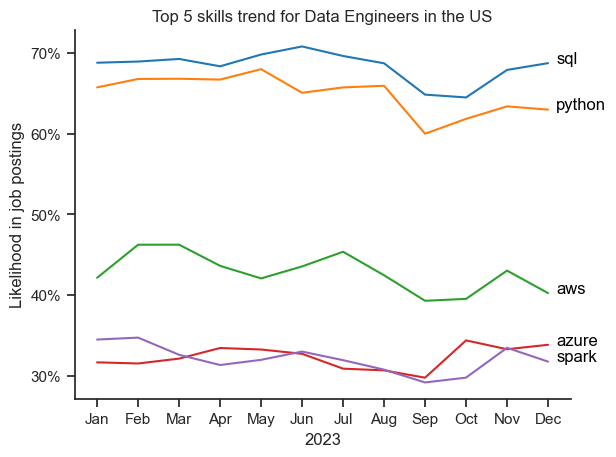

In [63]:
df_plot = df_DE_US_percent.iloc[:,:5]

sns.lineplot(df_plot,dashes=False,palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title('Top 5 skills trend for Data Engineers in the US')
plt.xlabel('2023')
plt.ylabel('Likelihood in job postings')
plt.legend().remove()

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black');

#### How well do jobs ans skills pay for Data Engineers ?

**Salary Distribution by Job Title**

In [64]:
# Drop NaN values from the columns 'salary_year_avg'
df_US = df_US.dropna(subset=['salary_year_avg'])

In [65]:
# Top 6 job titles in the US
job_titles = df_US['job_title_short'].value_counts().sort_values(ascending=False).head(6).index.tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [66]:
# Filter the df for the top 6 job titles
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [67]:
# Order the job titles by median salary
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

Plot the top 6 job titles salary distributions using a box plot.

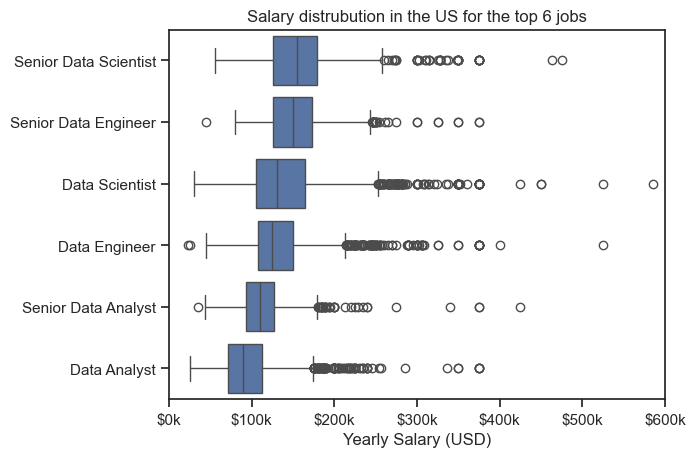

In [68]:
sns.boxplot(data=df_US_top6,x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary distrubution in the US for the top 6 jobs')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel(None)
plt.xlim(0,600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}k'));

**Investigate Median salary VS Skill for Data Engineers**

In [69]:
# Only get data engineer jobs in the US
df_DE_US = df [(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DE_US = df_DE_US.dropna(subset=['salary_year_avg'])

In [70]:
# Explode 'job_skills' column
df_DE_US = df_DE_US.explode('job_skills')

Gets the top 10 highest-paying skills for Data Engineers by calculating the median salary for each skill

In [71]:
df_DE_top_pay = df_DE_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)

df_DE_top_pay

,count,median
job_skills,,
mongo,78,208114.0
vue,1,200000.0
solidity,1,192500.0
node,24,190000.0
ggplot2,2,176250.0
macos,2,172000.0
clojure,2,170866.5
atlassian,18,169860.0
rust,7,165000.0


Gets the top 10 in-demand skills for Data Engineers by calculating the count for each skill

In [72]:
df_DE_top_skills = df_DE_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_DE_top_skills = df_DE_top_skills.head(10).sort_values(by='median',ascending=False)

df_DE_top_skills

,count,median
job_skills,,
kafka,536,145000.00000
nosql,519,140000.00000
spark,968,137410.15625
java,732,137000.00000
redshift,514,135000.00000
aws,1313,131000.00000
snowflake,765,130700.00000
python,2007,127794.50000
sql,2110,125000.00000


Creates two horizontal bar charts:

1. Displays the highest paid skills <br>
2. Shows the most in demand skills

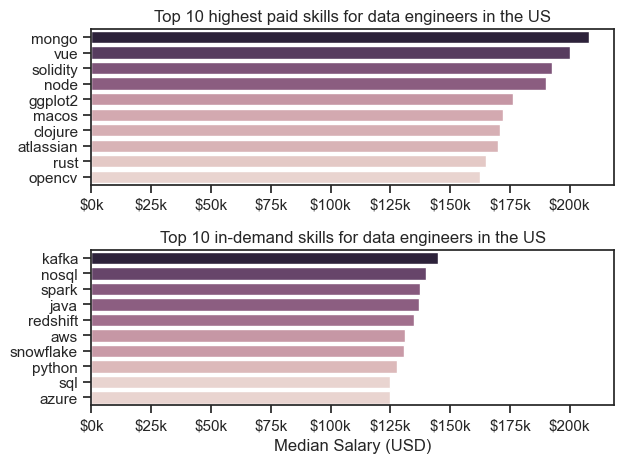

In [73]:
fig, ax = plt.subplots(2,1)


#Top 10 highest paid skills for data engineers in the US
sns.barplot(data=df_DE_top_pay,x='median',y=df_DE_top_pay.index,hue='median',ax=ax[0])
ax[0].set_title('Top 10 highest paid skills for data engineers in the US')
ax[0].legend().remove()
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda s, _: f'${int(s/1000)}k'))

#Top 10 in-demand skills for data engineers in the US
sns.set_theme(style='ticks')
sns.barplot(data=df_DE_top_skills,x='median',y=df_DE_top_skills.index,hue='median',ax=ax[1])
ax[1].set_title('Top 10 in-demand skills for data engineers in the US')
ax[1].legend().remove()
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel(None)
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda s, _: f'${int(s/1000)}k'))

sns.set_theme(style='ticks')
plt.tight_layout();

#### What is the most optimal skill to learn for Data Engineers ?

In [74]:

# Filter for the data engineers jobs in the US
df_DE_US = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DE_US = df_DE_US.dropna(subset=['salary_year_avg'])

# Exlode the 'job_skills' column
df_DE_US_exploded = df_DE_US.explode('job_skills')

df_DE_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
92,120000.0,sql
92,120000.0,python
146,129500.0,golang
146,129500.0,scala
146,129500.0,python


In [75]:
# Calculate count and median salary of each skill in job_skills
df_DE_skills = df_DE_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# Rename columns
df_DE_skills = df_DE_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

# Find count of Data Engineer jobs in US with salary info
DE_job_count = len(df_DE_US)

# Calculate skill percentage of each skill
df_DE_skills['skill_percent'] = df_DE_skills['skill_count'] / DE_job_count * 100

# Filter out any skills that don't have any jobs associated with them
df_DE_skills = df_DE_skills[df_DE_skills['skill_count'] > 0]

df_DE_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2110,125000.00000,72.384220
python,2007,127794.50000,68.850772
aws,1313,131000.00000,45.042882
spark,968,137410.15625,33.207547
azure,961,125000.00000,32.967410
...,...,...,...
next.js,1,145000.00000,0.034305
nltk,1,130000.00000,0.034305
cobol,1,125000.00000,0.034305


**Median Salary vs Percent Skill Demand**

Filters for Data Engineer skills that exceed a certain percentage (skill_limit)

In [76]:
skill_limit = 10

df_DE_skills_high_demand = df_DE_skills[df_DE_skills['skill_percent'] > skill_limit]

df_DE_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2110,125000.00000,72.384220
python,2007,127794.50000,68.850772
aws,1313,131000.00000,45.042882
spark,968,137410.15625,33.207547
azure,961,125000.00000,32.967410
snowflake,765,130700.00000,26.243568
java,732,137000.00000,25.111492
kafka,536,145000.00000,18.387650
nosql,519,140000.00000,17.804460


Create a scatter plot to visualize the relationship between the percentage of Data Engineer jobs that require specific skills and the median salary for those skills.



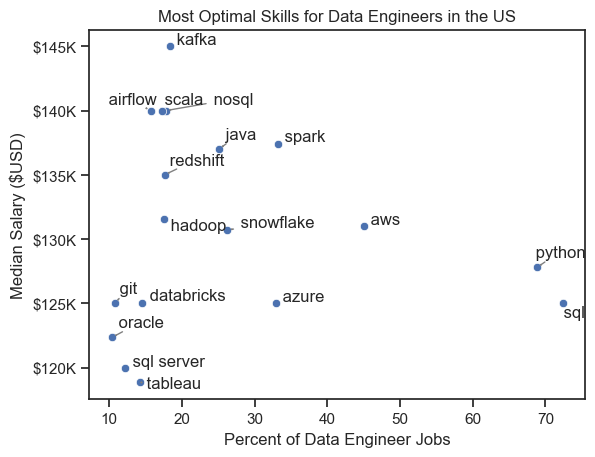

In [77]:
from adjustText import adjust_text

sns.scatterplot(data=df_DE_skills_high_demand,x='skill_percent', y='median_salary')
plt.xlabel('Percent of Data Engineer Jobs')
plt.ylabel('Median Salary ($USD)') 
plt.title('Most Optimal Skills for Data Engineers in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DE_skills_high_demand.index):
    texts.append(plt.text(df_DE_skills_high_demand['skill_percent'].iloc[i], df_DE_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

sns.set_theme(style='ticks');